In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [2]:
df=pd.read_csv('diabetes_risk_prediction_dataset.csv')
dft=pd.read_csv('diabetes_risk_prediction_dataset.csv')
df.columns = [x.title() for x in df.columns]
df.head()

,Age,Gender,Polyuria,Polydipsia,Sudden Weight Loss,Weakness,Polyphagia,Genital Thrush,Visual Blurring,Itching,Irritability,Delayed Healing,Partial Paresis,Muscle Stiffness,Alopecia,Obesity,Class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [3]:
df['Gender'] = df['Gender'].apply(lambda x: 0 if x == 'Female' else 1)
df['Polyuria'] = df['Polyuria'].apply(lambda x: 0 if x == 'No' else 1)
df['Polydipsia'] = df['Polydipsia'].apply(lambda x: 0 if x == 'No' else 1)
df['Sudden Weight Loss'] = df['Sudden Weight Loss'].apply(lambda x: 0 if x == 'No' else 1)
df['Weakness'] = df['Weakness'].apply(lambda x: 0 if x == 'No' else 1)
df['Polyphagia'] = df['Polyphagia'].apply(lambda x: 0 if x == 'No' else 1)
df['Genital Thrush'] = df['Genital Thrush'].apply(lambda x: 0 if x == 'No' else 1)
df['Visual Blurring'] = df['Visual Blurring'].apply(lambda x: 0 if x == 'No' else 1)
df['Itching'] = df['Itching'].apply(lambda x: 0 if x == 'No' else 1)
df['Irritability'] = df['Irritability'].apply(lambda x: 0 if x == 'No' else 1)
df['Delayed Healing'] = df['Delayed Healing'].apply(lambda x: 0 if x == 'No' else 1)
df['Partial Paresis'] = df['Partial Paresis'].apply(lambda x: 0 if x == 'No' else 1)
df['Muscle Stiffness'] = df['Muscle Stiffness'].apply(lambda x: 0 if x == 'No' else 1)
df['Alopecia'] = df['Alopecia'].apply(lambda x: 0 if x == 'No' else 1)
df['Obesity'] = df['Obesity'].apply(lambda x: 0 if x == 'No' else 1)
df['Class'] = df['Class'].apply(lambda x: 0 if x == 'Negative' else 1)
df.head()

,Age,Gender,Polyuria,Polydipsia,Sudden Weight Loss,Weakness,Polyphagia,Genital Thrush,Visual Blurring,Itching,Irritability,Delayed Healing,Partial Paresis,Muscle Stiffness,Alopecia,Obesity,Class
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


In [4]:
df.isnull().sum()

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
Sudden Weight Loss    0
Weakness              0
Polyphagia            0
Genital Thrush        0
Visual Blurring       0
Itching               0
Irritability          0
Delayed Healing       0
Partial Paresis       0
Muscle Stiffness      0
Alopecia              0
Obesity               0
Class                 0
dtype: int64

In [5]:
Count=df['Age'].count()
Polyuria=dft['Polyuria'].value_counts()['Yes']
Polydipsia=dft['Polydipsia'].value_counts()['Yes']
Sudden_Weight_Loss=dft['sudden weight loss'].value_counts()['Yes']
Weakness=dft['weakness'].value_counts()['Yes']
Polyphagia=dft['Polyphagia'].value_counts()['Yes']
Genital_thrush=dft['Genital thrush'].value_counts()['Yes']
Visual_Blurring=dft['visual blurring'].value_counts()['Yes']
Itching=dft['Itching'].value_counts()['Yes']
Irritability=dft['Irritability'].value_counts()['Yes']
Delayed_Healing=dft['delayed healing'].value_counts()['Yes']
Partial_Paresis=dft['partial paresis'].value_counts()['Yes']
Muscle_Stiffness=dft['muscle stiffness'].value_counts()['Yes']
Alopecia=dft['Alopecia'].value_counts()['Yes']
Obesity=dft['Obesity'].value_counts()['Yes']


In [6]:
print("No. of Patients with Polyuria Symptoms per Total Patients-"+(str(Polyuria)+"/"+str(Count)))
print("No. of Patients with Polydipsia Symptoms per Total Patients-"+(str(Polydipsia)+"/"+str(Count)))
print("No. of Patients with Sudden Weight Loss Symptoms per Total Patients-"+(str(Sudden_Weight_Loss)+"/"+str(Count)))
print("No. of Patients with Weakness Symptoms per Total Patients-"+(str(Weakness)+"/"+str(Count)))
print("No. of Patients with Poluphagia Symptoms per Total Patients-"+(str(Polyphagia)+"/"+str(Count)))
print("No. of Patients with Genital Thrush Symptoms per Total Patients-"+(str(Genital_thrush)+"/"+str(Count)))
print("No. of Patients with Visual Blurring Symptoms per Total Patients-"+(str(Visual_Blurring)+"/"+str(Count)))
print("No. of Patients with Itching Symptoms per Total Patients-"+(str(Itching)+"/"+str(Count)))
print("No. of Patients with Irritability Symptoms per Total Patients-"+(str(Irritability)+"/"+str(Count)))
print("No. of Patients with Delayed Healing Symptoms per Total Patients-"+(str(Delayed_Healing)+"/"+str(Count)))
print("No. of Patients with Partial Paresis Symptoms per Total Patients-"+(str(Partial_Paresis)+"/"+str(Count)))
print("No. of Patients with Muslce Stiffness Symptoms per Total Patients-"+(str(Muscle_Stiffness)+"/"+str(Count)))
print("No. of Patients with Alopecia Symptoms per Total Patients-"+(str(Alopecia)+"/"+str(Count)))
print("No. of Patients with Obesity Symptoms per Total Patients-"+(str(Obesity)+"/"+str(Count)))

No. of Patients with Polyuria Symptoms per Total Patients-258/520
No. of Patients with Polydipsia Symptoms per Total Patients-233/520
No. of Patients with Sudden Weight Loss Symptoms per Total Patients-217/520
No. of Patients with Weakness Symptoms per Total Patients-305/520
No. of Patients with Poluphagia Symptoms per Total Patients-237/520
No. of Patients with Genital Thrush Symptoms per Total Patients-116/520
No. of Patients with Visual Blurring Symptoms per Total Patients-233/520
No. of Patients with Itching Symptoms per Total Patients-253/520
No. of Patients with Irritability Symptoms per Total Patients-126/520
No. of Patients with Delayed Healing Symptoms per Total Patients-239/520
No. of Patients with Partial Paresis Symptoms per Total Patients-224/520
No. of Patients with Muslce Stiffness Symptoms per Total Patients-195/520
No. of Patients with Alopecia Symptoms per Total Patients-179/520
No. of Patients with Obesity Symptoms per Total Patients-88/520


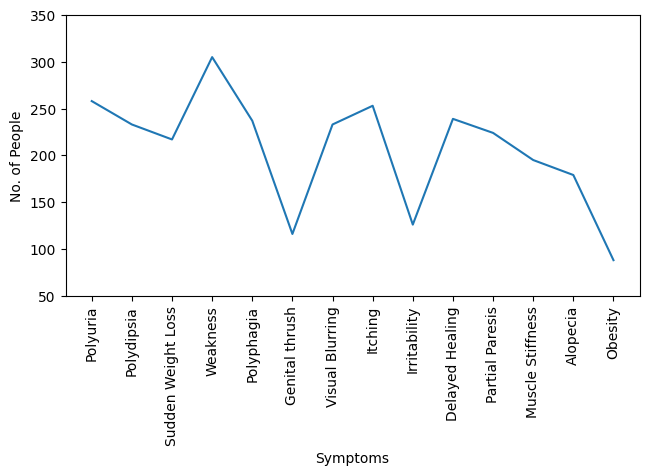

In [7]:
Symptoms1=[Polyuria,Polydipsia,Sudden_Weight_Loss,Weakness,Polyphagia,Genital_thrush,Visual_Blurring,Itching,Irritability,Delayed_Healing,Partial_Paresis,Muscle_Stiffness,Alopecia,Obesity]
Symptoms2=["Polyuria","Polydipsia","Sudden Weight Loss","Weakness","Polyphagia","Genital thrush","Visual Blurring","Itching","Irritability","Delayed Healing","Partial Paresis","Muscle Stiffness","Alopecia","Obesity"]
plt.plot(Symptoms2,Symptoms1)
plt.xticks(Symptoms2, rotation=90)
plt.xlabel("Symptoms",)
plt.tick_params(axis='x', which='major', labelsize=10)
plt.tight_layout()
plt.ylabel("No. of People")
plt.ylim(50,350)
plt.show()

Percentage of having certain Symptoms

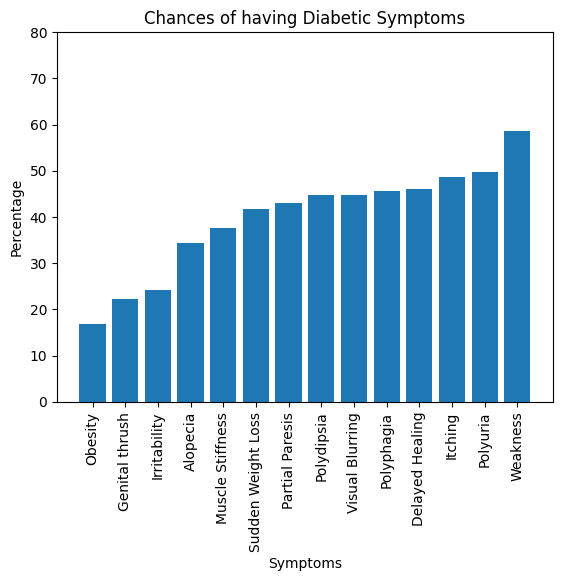

In [8]:
Percentage=[(Polyuria/Count)*100,(Polydipsia/Count)*100,(Sudden_Weight_Loss/Count)*100,(Weakness/Count)*100,(Polyphagia/Count)*100,(Genital_thrush/Count)*100,(Visual_Blurring/Count)*100,(Itching/Count)*100,(Irritability/Count)*100,(Delayed_Healing/Count)*100,(Partial_Paresis/Count)*100,(Muscle_Stiffness/Count)*100,(Alopecia/Count)*100,(Obesity/Count)*100,]
x=dict(zip(Symptoms2, Percentage))
y=dict(sorted(x.items(), key=lambda item: item[1]))
keys=[key for key in y.keys()]
values=[value for value in y.values()]
plt.bar(keys,values)
plt.xticks(keys, rotation=90)
plt.xlabel("Symptoms")
plt.ylabel("Percentage")
plt.ylim([0, 80])
plt.title("Chances of having Diabetic Symptoms")
plt.show()

/tmp/ipykernel_3290/532283908.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(df['Age'],bins=30)


Text(0.5, 1.0, '')

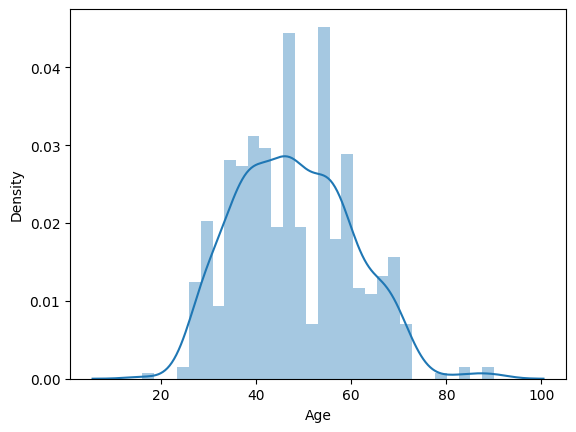

In [9]:
sn.distplot(df['Age'],bins=30)
plt.title("") 

Predicting True Positives, True Negatives, False Positives, False Negatives using Random Classifier

In [10]:
X=df.drop('Class',axis='columns')
X

,Age,Gender,Polyuria,Polydipsia,Sudden Weight Loss,Weakness,Polyphagia,Genital Thrush,Visual Blurring,Itching,Irritability,Delayed Healing,Partial Paresis,Muscle Stiffness,Alopecia,Obesity
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,0,1,1,1,0,1,0,0,1,0,1,1,0,0,0
516,48,0,1,1,1,1,1,0,0,1,1,1,1,0,0,0
517,58,0,1,1,1,1,1,0,1,0,0,0,1,1,0,1
518,32,0,0,0,0,1,0,0,1,1,0,1,0,0,1,0


In [11]:
y=df['Class']
y

0      1
1      1
2      1
3      1
4      1
      ..
515    1
516    1
517    1
518    0
519    0
Name: Class, Length: 520, dtype: int64

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [13]:
model = RandomForestClassifier(n_estimators=50, criterion='entropy', bootstrap=True)
model.fit(X_train.values, y_train.values)
model.score(X_test.values, y_test.values)

0.9903846153846154

In [14]:
y_pred = model.predict(X_test.values)
cm = confusion_matrix(y_test, y_pred)

Plotting a Heatmap for TN,FP,FN,TP

<Axes: >

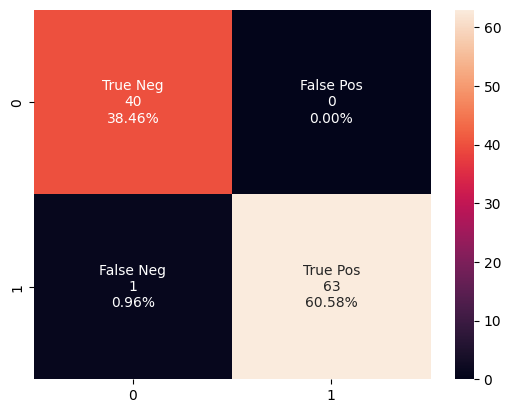

In [15]:
group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in cm.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sn.heatmap(cm, annot=labels, fmt='')

In [16]:
Random_Forest=accuracy_score(y_pred,y_test)
print("Accuracy is "+str(Random_Forest*100)+" %")
print(classification_report(y_pred,y_test))

Accuracy is 99.03846153846155 %
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        41
           1       0.98      1.00      0.99        63

    accuracy                           0.99       104
   macro avg       0.99      0.99      0.99       104
weighted avg       0.99      0.99      0.99       104

